<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/mobilenet1122_mob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow
import glob 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

In [3]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
len(trans)

20

In [4]:
s2 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/GOGORO_S2_裁/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/GOGORO_S2_裁/*.JPG") 
s2 = s2 + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/GOGORO_S2_裁/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/GOGORO_S2_裁/*.JPG") 
s2 = s2 + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_S2_裁/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_S2_裁/*.JPG") 

gp = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/KYMCO_GP_125_裁/*") +  glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/KYMCO_GP_125_裁/*") 
gp = gp + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_GP_125_裁/*")

krv = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_KRV_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/KYMCO_KRV_裁/*")

fiddle = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_FIDDLE_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/SYM_FIDDLE_125_裁/*")

sr = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_JET_SR_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/SYM_JET_SR_125_裁/*")
sr = sr + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/SYM_JET_SR_125_裁/*")

vivo = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_活力_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/SYM_活力_125_裁/*")
vivo = vivo + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/SYM_活力_125_裁/*")

famous = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_新名流125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/KYMCO_新名流125_裁/*")
famous = famous + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/KYMCO_新名流125_裁/*")

drg = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_DRG_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/SYM_DRG_裁/*")
drg = drg + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/SYM_DRG_裁/*")

duke = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_新迪爵_125 _裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/SYM_新迪爵_125 _裁/*")
duke = duke + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/SYM_新迪爵_125 _裁/*")

limi = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_LIMI_125_已裁減/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_六代勁戰_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/YAMAHA_六代勁戰_125_裁/*")
gryphus6 = gryphus6 + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/YAMAHA_六代勁戰_125_裁/*")


force = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_FORCE_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/YAMAHA_FORCE_裁/*")
force = force + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/YAMAHA_FORCE_裁/*")

viva = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_VIVA_MIX_裁/*")

s3 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/GOGORO_S3_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/GOGORO_S3_裁/*")
s3 = s3 + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/GOGORO_S3_裁/*")

like = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_LIKE_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/KYMCO_LIKE_125_裁/*")
like = like + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/KYMCO_LIKE_125_裁/*")

many = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/KYMCO_MANY_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/KYMCO_MANY_125_裁/*")
many = many + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/KYMCO_MANY_125_裁/*")

bws = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_BWS_125_裁/*")

sl = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/SYM_JET_SL_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/SYM_JET_SL_125_裁/*")
sl = sl + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/SYM_JET_SL_125_裁/*")

axiz = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_勁豪_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/YAMAHA_勁豪_125_裁/*")
axiz = axiz + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 含車群/YAMAHA_勁豪_125_裁/*")

jog = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/嚴選資料集/YAMAHA_JOG_125_裁/*") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集1116/YAMAHA_JOG_125_裁/*")

In [5]:
type(gp)

list

In [6]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6 + force + viva + s3 + like + many + bws + sl + axiz + jog,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6) + [11] * len(force) + [12] * len(viva) + [13] * len(s3)
     + [14] * len(like) + [15] * len(many) + [16] * len(bws) + [17] * len(sl) + [18] * len(axiz) + [19] * len(jog)
})
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]

df


,path,ans
0,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
1,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
2,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
3,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
4,/content/drive/MyDrive/Tebame_第四組_機車辨識/1118晚上 ...,0
...,...,...
10532,/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集11...,19
10533,/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集11...,19
10534,/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集11...,19
10535,/content/drive/MyDrive/Tebame_第四組_機車辨識/測試測試集11...,19


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 709 1021  357  831  421  617  766  461  827  320  824  486  182  416
  314  471  269  264  761  220]


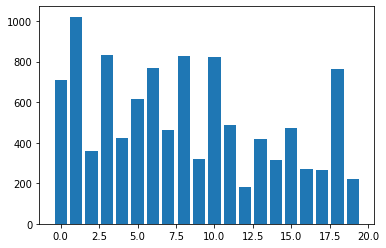

In [7]:
list_ = [i for n, i in enumerate(df["ans"])]
cls, count = np.unique(list_, return_counts=True)
plt.bar(cls, count)
print(cls, count, sep="\n")
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]


In [8]:
# clear graph
tensorflow.keras.backend.clear_session()

In [9]:
base_model = MobileNet(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
# x = layers.Dense(2048, activation="selu")(x)
# x = layers.Dense(512, activation="selu")(x)
x = layers.Dense(256, activation="selu")(x)
predictions = layers.Dense(20, activation='softmax')(x)

# Freeze layers 凍結層 把遷移來的卷積的參數固定
for l in base_model.layers:
  l.trainable = False

# 把卷積和後面的分類層合在一起
model = models.Model(base_model.input, predictions)
model.summary()
# base_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [10]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="Adam",
        metrics=["acc"]
)

In [11]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [12]:
y

array([ 0,  0,  0, ..., 19, 19, 19])

In [13]:
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
# [     709  1021  357   831   421   617   766    461   827  320    824     486   182   416  314   471   269  264   761  220]
s2 = x[y == 0]
gp = x[y == 1]
krv = x[y == 2]
fiddle = x[y == 3]
sr = x[y == 4]
vivo = x[y == 5]
famous = x[y == 6]
drg = x[y == 7]
duke = x[y == 8]
limi = x[y == 9]
gryphus6 = x[y == 10]
force = x[y == 11]
viva = x[y == 12]
s3 = x[y == 13]
like = x[y == 14]
many = x[y == 15]
bws = x[y == 16]
sl = x[y == 17]
axiz = x[y == 18]
jog = x[y == 19]

In [14]:
len(s2)

709

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
s2_train, s2_test = train_test_split(s2, test_size=0.4)

gp_train, gp_test = train_test_split(gp, test_size=0.6)

fiddle_train, fiddle_test = train_test_split(fiddle, test_size=0.5)

vivo_train, vivo_test = train_test_split(vivo, test_size=0.3)

famous_train, famous_test = train_test_split(famous, test_size=0.45)

drg_train, drg_test = train_test_split(drg, test_size=0.1)

duke_train, duke_test = train_test_split(duke, test_size=0.5)

gryphus6_train, gryphus6_test = train_test_split(gryphus6, test_size=0.5)

force_train, force_test = train_test_split(force, test_size=0.15)

many_train, many_test = train_test_split(many, test_size=0.1)

axiz_train, axiz_test = train_test_split(axiz, test_size=0.45)

In [27]:
test_x = np.concatenate([s2_test, gp_test, fiddle_test, vivo_test, famous_test, drg_test, duke_test, gryphus6_test, force_test, many_test, axiz_test])

In [28]:
[len(i) for i in [s2_test, gp_test, fiddle_test, vivo_test, famous_test, drg_test, duke_test, gryphus6_test, force_test, many_test, axiz_test]]
#           0     1     3      5      6       7     8      10      11      15    18

[284, 613, 416, 186, 345, 47, 414, 412, 73, 48, 343]

In [29]:
test_y = np.array([0]*284+[1]*613+[3]*416+[5]*186+[6]*345+[7]*47+[8]*414+[10]*412+[11]*73+[15]*48+[18]*343)

In [30]:
print(len(test_x))
print(len(test_y))

3181
3181


In [16]:
len(jog)

220

In [17]:
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
x = np.concatenate([s2_train, gp_train, krv, fiddle_train, sr, vivo_train, famous_train, drg_train, duke_train, limi, gryphus6_train, force_train, viva, s3, like, many_train, bws, sl, axiz_train, jog]) 
y = np.array([0]*425+[1]*408+[2]*357+[3]*415+[4]*421+[5]*431+[6]*421+[7]*414+[8]*413+[9]*320+[10]*412+[11]*413+[12]*182+[13]*416+[14]*314+[15]*423+[16]*269+[17]*264+[18]*418+[19]*220)

In [18]:
len(x)

7356

In [19]:
len(y)

7356

In [20]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)


[[[[-0.10588235 -0.16862744 -0.18431371]
   [-0.09803921 -0.1607843  -0.18431371]
   [-0.0745098  -0.11372548 -0.14509803]
   ...
   [-0.31764704 -0.34117645 -0.38039213]
   [-0.26274508 -0.27843136 -0.31764704]
   [-0.20784312 -0.23921567 -0.27058822]]

  [[-0.04313725 -0.0745098  -0.11372548]
   [-0.01960784 -0.05098039 -0.08235294]
   [-0.01176471 -0.05098039 -0.08235294]
   ...
   [-0.31764704 -0.34117645 -0.372549  ]
   [-0.19215685 -0.23137254 -0.26274508]
   [-0.19215685 -0.26274508 -0.27843136]]

  [[-0.32549018 -0.24705881 -0.18431371]
   [-0.25490195 -0.23137254 -0.18431371]
   [-0.19215685 -0.24705881 -0.2235294 ]
   ...
   [-0.31764704 -0.3490196  -0.38823527]
   [-0.19999999 -0.24705881 -0.27843136]
   [ 0.01176476 -0.06666666 -0.12156862]]

  ...

  [[ 0.22352946  0.07450986  0.00392163]
   [ 0.4431373   0.21568632  0.13725495]
   [ 0.47450984  0.24705887  0.1686275 ]
   ...
   [ 0.05098045 -0.04313725 -0.1607843 ]
   [ 0.33333337  0.27058828  0.12941182]
   [ 0.37254906 

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6620,)
(736,)
(6620,)
(736,)


In [22]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import keras
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.99
keras.callbacks.LearningRateScheduler(scheduler)


callbacks = [
             EarlyStopping(patience=12, restore_best_weights=True),
             ModelCheckpoint("/content/1122_mobilenet_all.h5", save_best_only=True),
             LearningRateScheduler(scheduler)
]

model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=500,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

Epoch 1/500
20/20 [==============================] - 155s 8s/step - loss: 4.0793 - acc: 0.1000 - val_loss: 2.5966 - val_acc: 0.2500 - lr: 0.0010
Epoch 2/500
20/20 [==============================] - 148s 8s/step - loss: 2.8052 - acc: 0.2025 - val_loss: 2.5921 - val_acc: 0.2667 - lr: 0.0010
Epoch 3/500
20/20 [==============================] - 144s 8s/step - loss: 2.4313 - acc: 0.2850 - val_loss: 1.9242 - val_acc: 0.4500 - lr: 0.0010
Epoch 4/500
20/20 [==============================] - 126s 7s/step - loss: 2.1337 - acc: 0.3675 - val_loss: 2.0069 - val_acc: 0.4333 - lr: 0.0010
Epoch 5/500
20/20 [==============================] - 129s 7s/step - loss: 2.0198 - acc: 0.3825 - val_loss: 1.9813 - val_acc: 0.4000 - lr: 0.0010
Epoch 6/500
20/20 [==============================] - 119s 6s/step - loss: 1.9214 - acc: 0.4425 - val_loss: 2.0173 - val_acc: 0.3833 - lr: 0.0010
Epoch 7/500
20/20 [==============================] - 119s 6s/step - loss: 1.7159 - acc: 0.4600 - val_loss: 1.4248 - val_acc: 0.516

In [24]:
# clear graph
tensorflow.keras.backend.clear_session()

In [25]:
from tensorflow.keras.models import load_model

model = load_model("/content/1122_mobilenet_all.h5")

In [31]:
generator_test = data_generator(test_x, test_y)

In [32]:
model.evaluate(generator_test, steps=160)

160/160 [==============================] - 707s 4s/step - loss: 0.7776 - acc: 0.7406


[0.7775604128837585, 0.7406250238418579]

In [34]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model

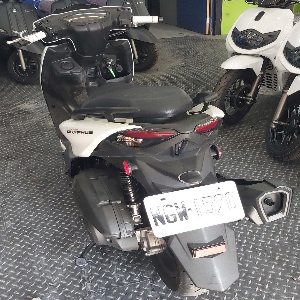

In [165]:

p = test_x
idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
path = p[idx]

img = image.load_img(path, target_size=(224,224))
cv2_imshow(cv2.resize(cv2.imread(path), (300,300)))

In [166]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]

preds = model.predict(x)
ans = preds.argmax(axis=1)
print("預測結果:" ,trans[ans[0]])

預測結果: gryphus6


In [167]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("conv_pw_13_relu") # 最後一層卷積
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1) 


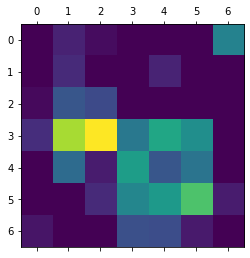

In [168]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [169]:
img = cv2.imread(path)

In [170]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY +img

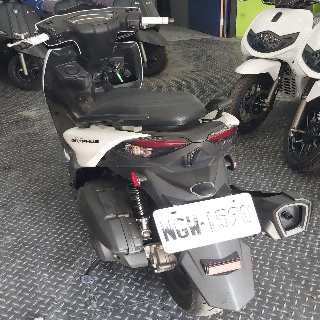

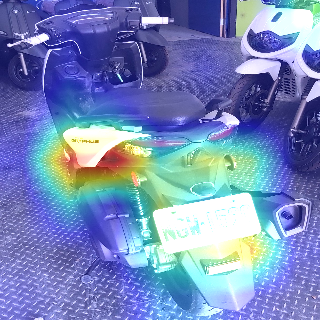

In [171]:
cv2_imshow(cv2.resize(cv2.imread(path), (320,320)))
cv2_imshow(cv2.resize(img, (320,320)))

In [42]:
x_test = test_x
y_test = test_y

In [43]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)
pre = pre.argmax(axis=1)

In [45]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
# trans1 = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "many", "sl", "axiz", "jog", "axiz", "jog"]

pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(19)],
        columns=["{}(預測)".format(trans[i]) for i in range(19)]
)

,s2(預測),gp(預測),krv(預測),fiddle(預測),sr(預測),vivo(預測),famous(預測),drg(預測),duke(預測),limi(預測),gryphus6(預測),force(預測),viva(預測),s3(預測),like(預測),many(預測),bws(預測),sl(預測),axiz(預測)
s2(正確),245,1,0,6,0,1,0,1,1,0,1,1,19,0,0,6,0,1,1
gp(正確),1,309,0,1,20,65,25,2,86,9,1,0,1,4,0,2,8,49,30
krv(正確),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fiddle(正確),0,1,0,410,0,0,0,0,0,0,0,0,2,1,0,0,0,0,2
sr(正確),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
vivo(正確),0,7,0,0,4,139,5,2,15,1,0,0,1,0,0,0,0,2,10
famous(正確),1,16,2,0,6,38,198,1,30,14,2,0,0,0,0,1,2,15,19
drg(正確),0,0,0,0,1,1,0,43,0,2,0,0,0,0,0,0,0,0,0
duke(正確),1,10,0,3,5,39,7,0,313,3,2,2,1,0,1,6,1,13,7
limi(正確),0,2,0,0,4,3,1,4,1,376,2,1,2,0,0,4,1,7,4
